In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread,imshow

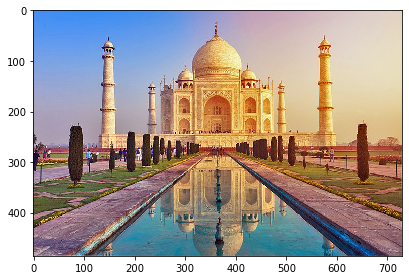

In [32]:
image1 = imread('pic.jpg')
type(image1)
image1
imshow(image1)

In [36]:
image2 = imread('pic.jpg', as_gray=True)

image2.shape
image1.shape

(486, 730, 3)

In [37]:
#Shape of images
print(image1.shape)
print(image2.shape)
image2

(486, 730, 3)
(486, 730)


array([[0.55956039, 0.54779569, 0.53995255, ..., 0.83233882, 0.84018196,
        0.84410353],
       [0.54387412, 0.53210941, 0.52426627, ..., 0.83233882, 0.83233882,
        0.83626039],
       [0.53210941, 0.52034471, 0.51250157, ..., 0.82841725, 0.83233882,
        0.83233882],
       ...,
       [0.70125176, 0.65839725, 0.70545608, ..., 0.39330627, 0.40114941,
        0.4403651 ],
       [0.73290706, 0.71722078, 0.70937765, ..., 0.38154157, 0.41683569,
        0.46389451],
       [0.75643647, 0.64663255, 0.60909843, ..., 0.40899255, 0.41291412,
        0.47173765]])

In [6]:
print(image1.size)
print(image2.size)

1064340
354780


**Feature extraction**

1. Pixel Features

2. Edge Features

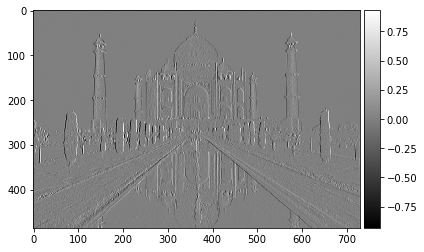

In [8]:
from skimage import filters
from skimage import feature
from skimage.filters import prewitt_h,prewitt_v
# prewitt kernel
pre_hor = prewitt_h(image2)
pre_ver = prewitt_v(image2)

# Sobel Kernel
ed_sobel = filters.sobel(image2)

#canny algorithm
can = feature.canny(image2)

imshow(pre_ver, cmap='gray');

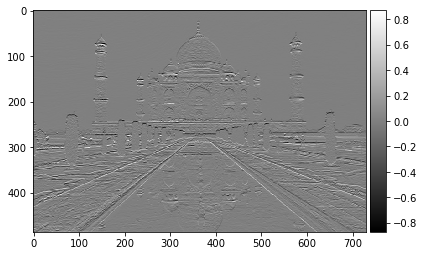

In [9]:
imshow(pre_hor, cmap='gray');

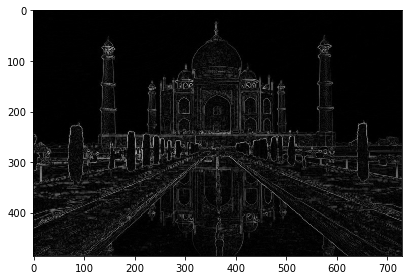

In [10]:
imshow(ed_sobel, cmap='gray');

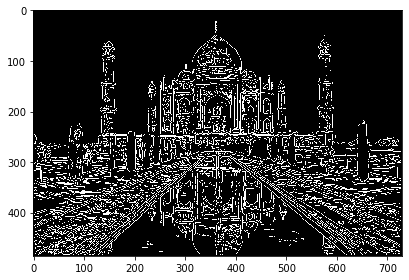

In [11]:
imshow(can, cmap='gray')

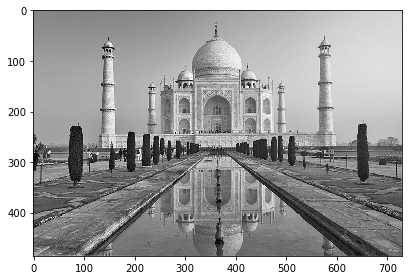

In [12]:
from skimage import color 
grayscale = color.rgb2gray(image1) 

imshow(grayscale)
plt.show()

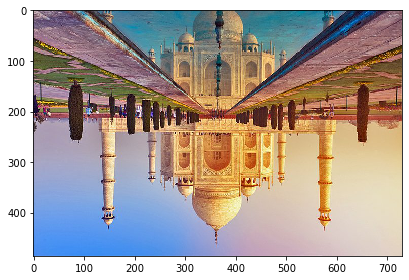

In [13]:
# Flip the image in up direction 
verticalflip = np.flipud(image1)

imshow(verticalflip)
plt.show()

(256, 128, 3)


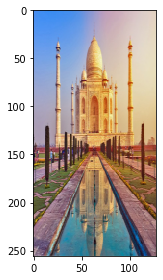

In [14]:
from skimage.transform import resize
resized_img = resize(image1, (256,128)) 
imshow(resized_img) 
print(resized_img.shape)

In [15]:
# resized_img=image1

In [16]:
from skimage.feature import hog
from skimage import exposure
#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

C:\Users\humer\AppData\Local\Temp\ipykernel_5996\4153077231.py:4: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


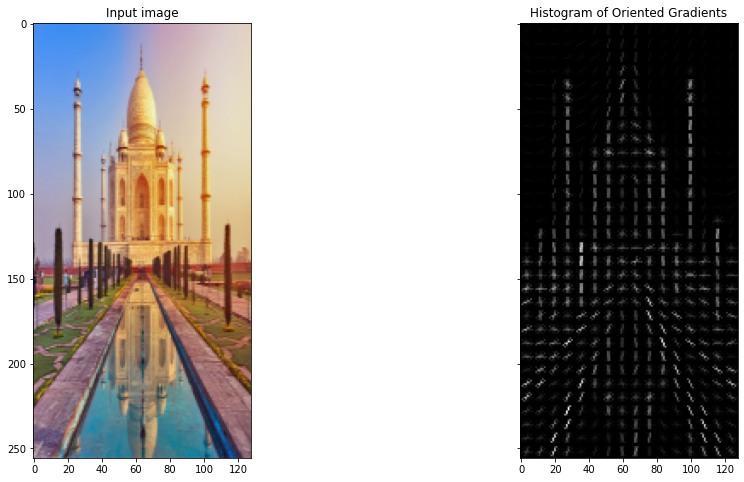

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [18]:
#feature vector
fd

array([0.15918705, 0.20522138, 0.09881621, ..., 0.28293299, 0.34784626,
       0.07463505])